In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

## Bank Personal Loan Campaign Dataset

## Exploratory Data Analysis

In [116]:
bplm = pd.read_csv('personal_loan_bank_data.csv')
bplm.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [117]:
bplm.shape

(5000, 14)

### Check Null Values 

In [118]:
bplm.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### List of Columns and their data types

In [119]:
bplm.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

## Descriptive Statistics

In [120]:
a = bplm.describe()
a.transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Remove ID and ZIPCODE columns

In [121]:
bplm.drop('ID', axis= 1, inplace= True)
bplm.drop('ZIP Code', axis= 1, inplace= True)

In [122]:
# tagging columns as numerical or categorical
bplm_cols = set(bplm.columns)
num_cols = set(['Mortgage', 'Age', 'CCAvg', 'Income', 'Experience'])
cat_cols = list(bplm_cols - num_cols)
print(cat_cols)

['CreditCard', 'CD Account', 'Family', 'Online', 'Education', 'Securities Account', 'Personal Loan']


In [123]:
for x in cat_cols:
    bplm[x] = bplm[x].astype('category')

bplm.dtypes

Age                      int64
Experience               int64
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

## Visualizations of Variables in the Dataset

### 1) Numerical Attribute Analysis

In [124]:
# function which shows density distribution of variables:
def sum_dist(col):
    col_min, col_max = bplm[col].min(), bplm[col].max()
    quant1, quant2, quant3 = bplm[col].quantile(0.25), bplm[col].quantile(0.50), bplm[col].quantile(0.75)

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('muted')
    
    plt.subplot(221)
    distribution_plot = sns.distplot(bplm[col], color = 'r')
    plt.title(f'Density dist. of {col.capitalize()}')
    
    plt.subplot(222)
    violin_plot = sns.violinplot(x = bplm[col], palette = 'Accent', split = True)
    plt.title(f'Violin plot of {col.capitalize()}')
    
    plt.subplot(223)
    box_plot = sns.boxplot(x=bplm[col], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'Box plot of {col.capitalize()}')
    
    plt.subplot(224)
    cum_dist_plot = sns.kdeplot(bplm[col], cumulative=True)
    plt.title(f'Cum. Density dist. of {col.capitalize()}')
    
    plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


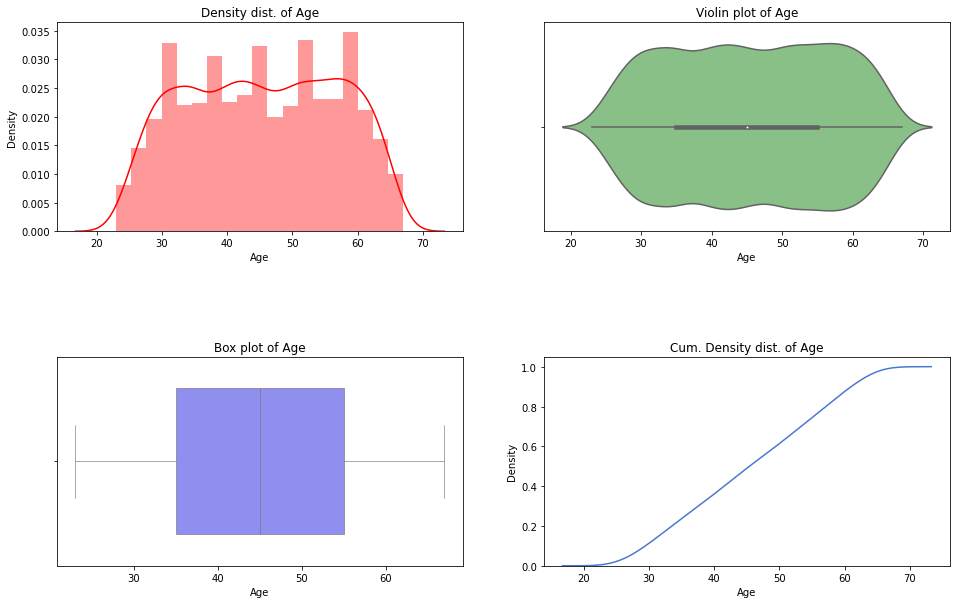

In [125]:
sum_dist('Age')

### Insights:
    Age is uniformly distributed between 23 and 57.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


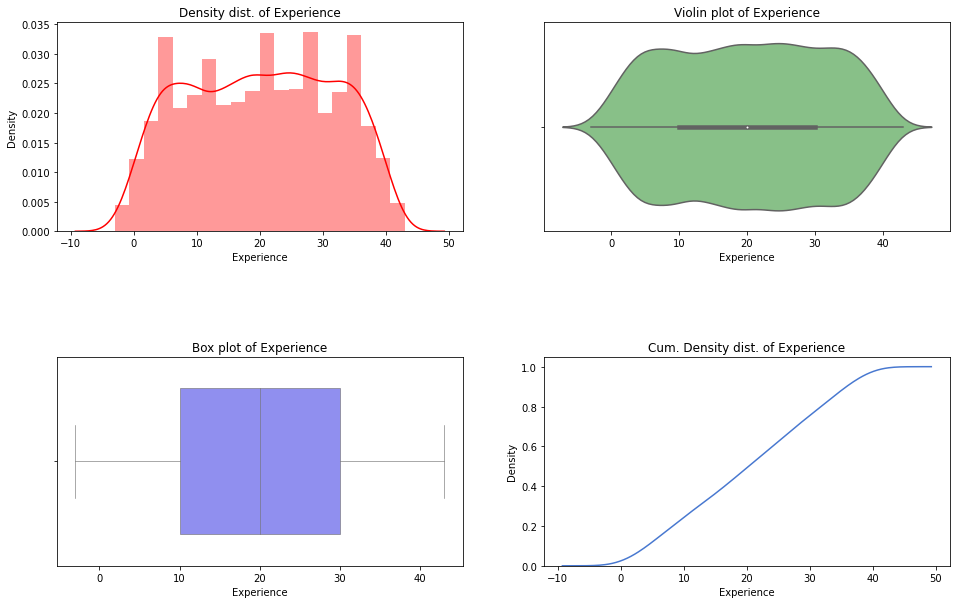

In [126]:
sum_dist('Experience')

### Insights:
    Customer Work Experience column is uniformly distributed between 0 and 43.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


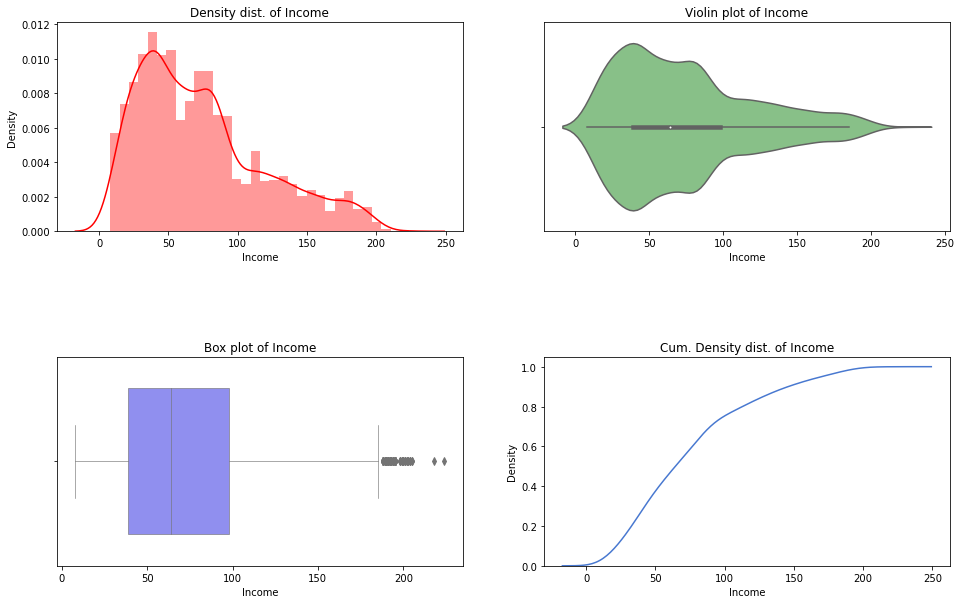

In [127]:
sum_dist('Income')

### Insights:
    1. Income is skewed to the left with $64000 as the median income.
    2. There is also a lot of outlier values.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


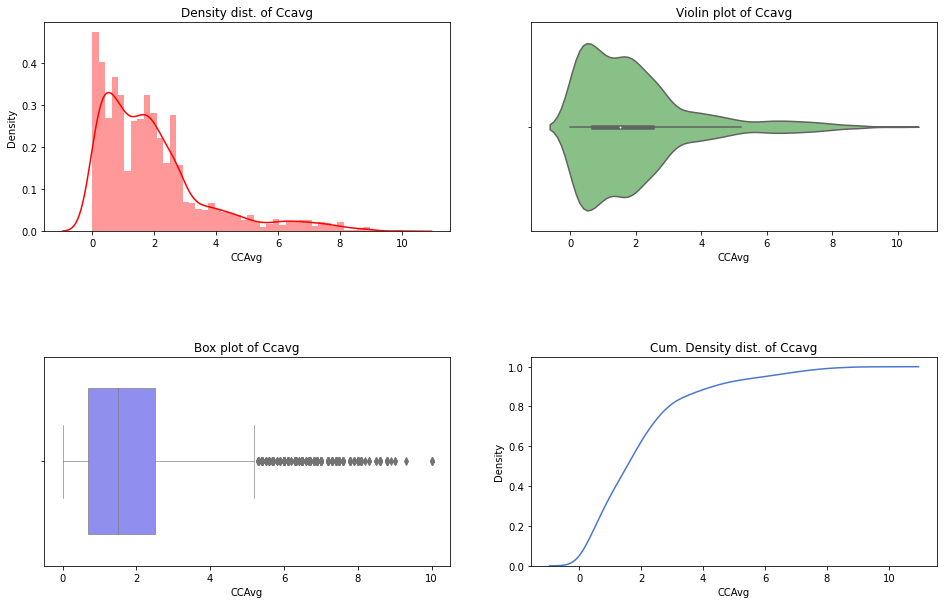

In [128]:
sum_dist('CCAvg')

### Insights:
    1. Average Monthly Credit Card Spending (CCAvg) is also skewed to the left.
    2. There is also a lot of outlier values.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


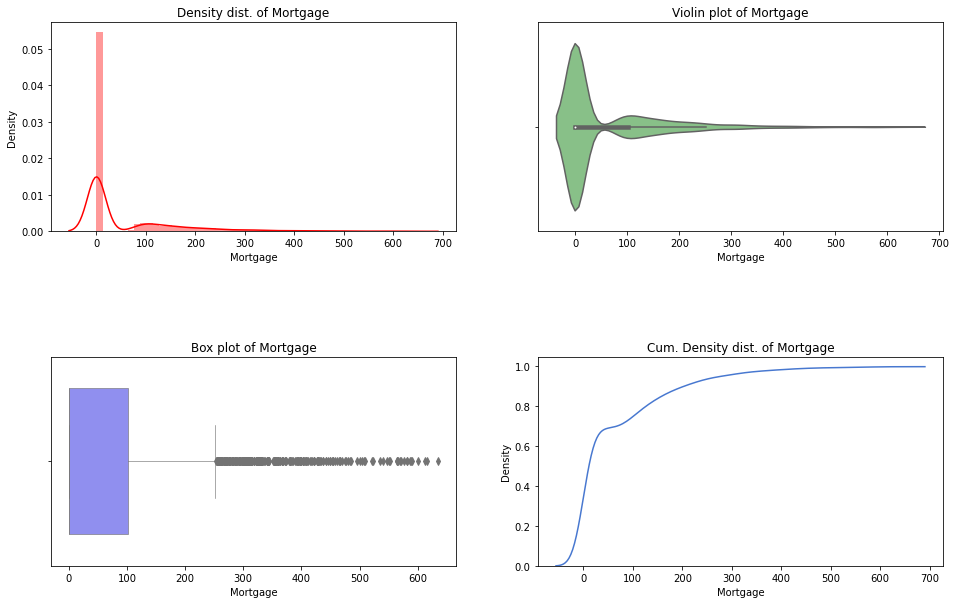

In [129]:
sum_dist('Mortgage')

### Insights:
    1. Mortgage values are skewed heavily to the left side with a lot of outliers.

## Categorical Attribute Analysis

In [154]:
# visualizing categorical variables in bar chart and pie chart
def visualize_cat_attr(col = 'Education'):
    shade1, shade2 = cm.inferno(np.linspace(.4, .8, 30)), cm.viridis(np.linspace(.4, .8, 30))
    
    cat_fig, base = plt.subplots(1, # 1 row
                           2, # 1 col
                           figsize=(16, 6) # our plot's width and height here
                          )
    
     
    # first subplot is pie chart
    col_dist = bplm.groupby(col).size()

    col_vals, col_idxs = col_dist.values.tolist(), col_dist.index.tolist()

    # custom percentage format function
    
    def percentage_func(per_val, p_vs):
        abs_val = int(per_val/100.*np.sum(p_vs))
        return "{:.1f}%\n({:d})".format(per_val, abs_val)

    
    # plot the pie graph
    chocks, labels, aut_lab = base[0].pie(col_vals, autopct=lambda pct: percentage_func(pct, col_vals),
                                      textprops=dict(color="w"))

    # legend for the pie graph
    base[0].legend(chocks, col_idxs,
              title="Legend",
              loc="upper center",
              bbox_to_anchor=(0.7, 0, 0.5, 1))

    
    # set the labels and fonts to the pie chart
    plt.setp(aut_lab, size=14, weight="medium")

    base[0].set_title(f'Piechart of {col.capitalize()}')
    
    # plot the bar chart
    
    bar_data = pd.pivot_table(bplm, index = [col], columns = ['Personal Loan'], values = ['Income'], aggfunc = len)

    bar_idx = bar_data.index.tolist() #- till here
    loan_no = bar_data.values[:, 0].tolist()
    loan_yes = bar_data.values[:, 1].tolist()
    
    l = np.arange(len(bar_idx))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = base[1].bar(l - width/2, loan_no, width, label='No Loan', color = shade1)
    rects2 = base[1].bar(l + width/2, loan_yes, width, label='Loan', color = shade2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    base[1].set_ylabel('Scores')
    base[1].set_title(f'Bar Graph of {col.capitalize()}')
    base[1].set_xticks(l)
    base[1].set_xticklabels(bar_idx)
    base[1].legend()
    
    def autolabel(rects):
        
        """Attach a text label above each bar in *rects*, displaying its height."""
        
        for rect in rects:
            height = rect.get_height()
            base[1].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        fontsize = 'large',   
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    cat_fig.tight_layout()
    plt.show()

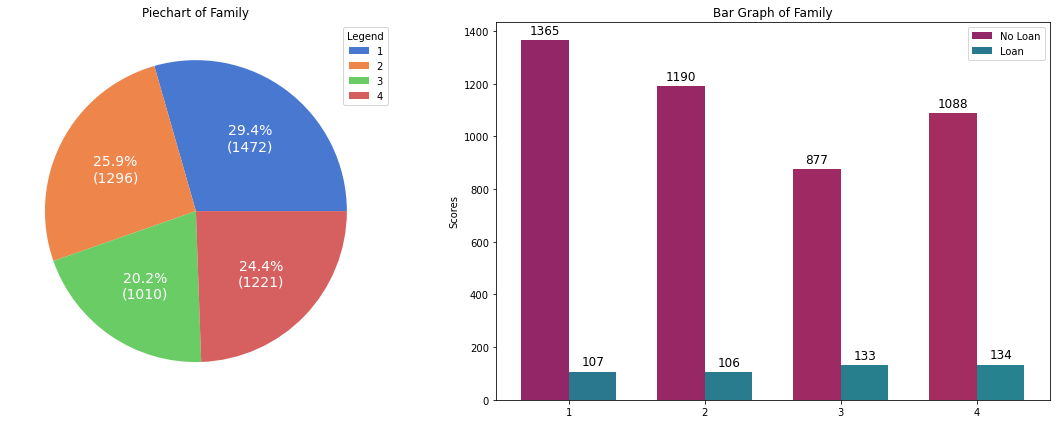

In [155]:
visualize_cat_attr('Family')

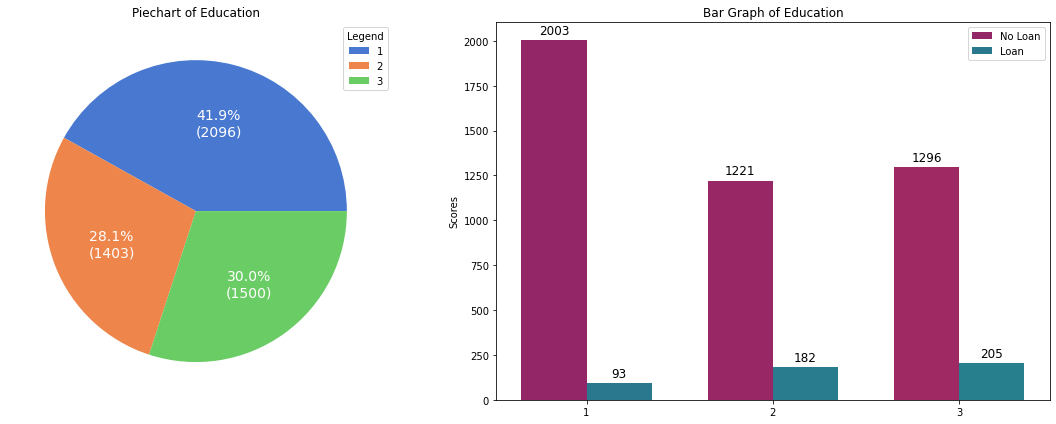

In [156]:
visualize_cat_attr('Education')

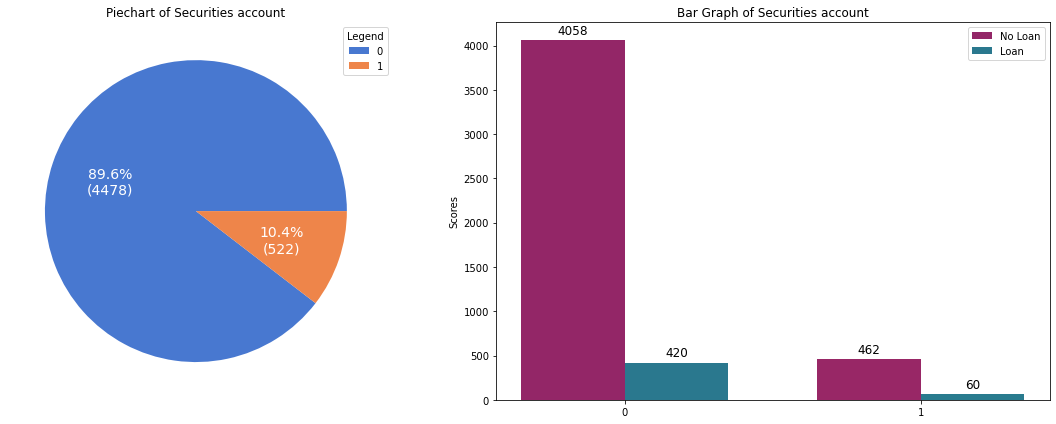

In [157]:
visualize_cat_attr('Securities Account')

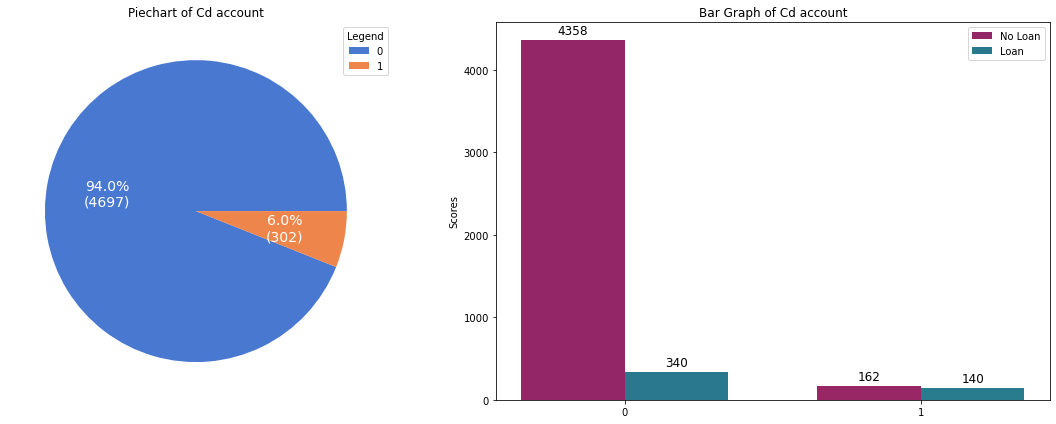

In [158]:
visualize_cat_attr('CD Account')

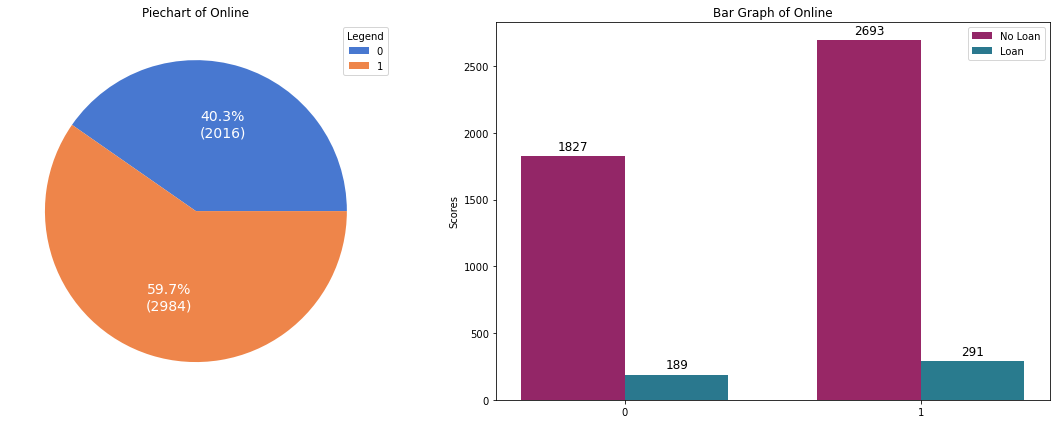

In [159]:
visualize_cat_attr('Online')

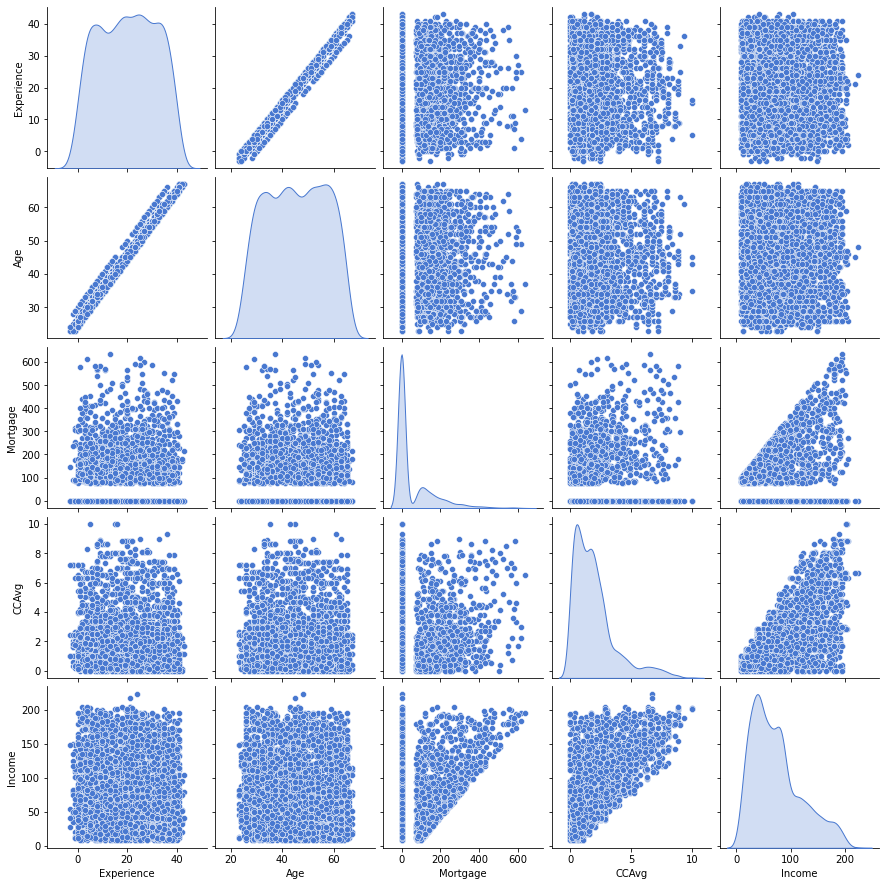

In [136]:
X = bplm.drop('Personal Loan', axis = 1)
Y = bplm[['Personal Loan']]

# Pair plot
sns.pairplot(X, diag_kind = 'kde', vars = list(num_cols))

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, stratify = Y)


from sklearn.feature_selection import mutual_info_classif
mutual_information = mutual_info_classif(X_train, y_train, n_neighbors=5, copy = True)


for i, j in zip(X_train.columns, mutual_information):
    print(i, ": ", j)


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Age :  0.006118107426940966
Experience :  0.0
Income :  0.135103236987981
Family :  0.0029929486111002213
CCAvg :  0.08137495938943484
Education :  0.013248458220560977
Mortgage :  0.02365356887594028
Securities Account :  0.0
CD Account :  0.02809186283896481
Online :  0.0
CreditCard :  0.0004094691024700836


In [138]:
## Transformation and Encoding

# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X_train_num = X_train.select_dtypes(include='number')
X_train_cat = X_train.select_dtypes(include='category')

num_attribs = list(X_train_num.columns)
cat_attribs = list(X_train_cat.columns)

transformer = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_train = transformer.fit_transform(X_train)
print(X_train.shape)
X_train[1, :]

y_train = np.array(y_train)
print(y_train.shape)

(4000, 20)
(4000, 1)


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


def train_model(model):
    m = model[1]
    y_train_pred = cross_val_predict(model[1], X_train, y_train, cv=5)
    cm = confusion_matrix(y_train, y_train_pred)
    print('Confusion matrix: ' + model[0])
    print(cm)
    print()
    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred)
    recall = recall_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred)
    print(f'{model[0]} Accuracy: {accuracy}')
    print(f'{model[0]} Precision: {precision}')
    print(f'{model[0]} Recall: {recall}')
    print(f'{model[0]} f1 - score: {f1}')

In [140]:
train_model(('Gaussian Naive Bayes', GaussianNB()))

Confusion matrix: Gaussian Naive Bayes
[[3411  205]
 [ 188  196]]

Gaussian Naive Bayes Accuracy: 0.90175
Gaussian Naive Bayes Precision: 0.48877805486284287
Gaussian Naive Bayes Recall: 0.5104166666666666
Gaussian Naive Bayes f1 - score: 0.49936305732484076


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

## Gaussian Naive Bayesian : 90.17% Accuracy

In [141]:
train_model(('Logistic Regression', LogisticRegression(solver="liblinear")))

Confusion matrix: Logistic Regression
[[3578   38]
 [ 124  260]]

Logistic Regression Accuracy: 0.9595
Logistic Regression Precision: 0.87248322147651
Logistic Regression Recall: 0.6770833333333334
Logistic Regression f1 - score: 0.7624633431085044


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

## Logistic Regression : 95.95% Accuracy

In [142]:
train_model(('k Nearest Neighbor', KNeighborsClassifier(n_neighbors= 7, weights = 'distance' )))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion matrix: k Nearest Neighbor
[[3611    5]
 [ 177  207]]

k Nearest Neighbor Accuracy: 0.9545
k Nearest Neighbor Precision: 0.9764150943396226
k Nearest Neighbor Recall: 0.5390625
k Nearest Neighbor f1 - score: 0.6946308724832215


C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

## KNN : 95.45% Accuracy

In [143]:
train_model(('SVM', SVC(gamma='auto')))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Confusion matrix: SVM
[[3615    1]
 [  87  297]]

SVM Accuracy: 0.978
SVM Precision: 0.9966442953020134
SVM Recall: 0.7734375
SVM f1 - score: 0.8709677419354839


## Support Vector Machine : 97.8% Accuracy

In [144]:
train_model(('CART', DecisionTreeClassifier()))

Confusion matrix: CART
[[3577   39]
 [  41  343]]

CART Accuracy: 0.98
CART Precision: 0.8979057591623036
CART Recall: 0.8932291666666666
CART f1 - score: 0.8955613577023498


## Decision Tree Classifier: 98% Accuracy

In [145]:
train_model(('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Confusion matrix: Random Forest
[[3608    8]
 [  46  338]]

Random Forest Accuracy: 0.9865
Random Forest Precision: 0.976878612716763
Random Forest Recall: 0.8802083333333334
Random Forest f1 - score: 0.926027397260274


## Random Forest Classifier: 98.65% Accuracy

### Hyperparameter tuning

In [146]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='f1',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='f1')

In [147]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [148]:
rf_clf = grid_search.best_estimator_

In [149]:
X_test = transformer.fit_transform(X_test)
print(X_test.shape)

(1000, 20)


In [150]:
y_test = np.array(y_test)
print(y_test.shape)

(1000, 1)


In [151]:
rf_clf.fit(X_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_features=8, n_estimators=30, random_state=42)

In [152]:
y_test_predict = rf_clf.predict(X_test)

In [153]:
rf_clf.score(X_test, y_test)

0.985

### Final Accuracy: 98.5%
## Best Model is Random Forest Classifier with parameters (max_features = 8, n_estimators = 30)

In [160]:
print(metrics.classification_report(y_test, y_test_predict, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.92      0.93      0.92        96
           0       0.99      0.99      0.99       904

    accuracy                           0.98      1000
   macro avg       0.95      0.96      0.96      1000
weighted avg       0.99      0.98      0.99      1000

